In [39]:
import numpy as np
import scipy.stats as sps
import pandas as pd
from sklearn import model_selection, datasets, metrics 

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [7]:
digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer()

## Датасет digits

In [62]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [38]:
digits['data']

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

#### Данные - картники 8x8 цифр, признаки - интенсивность цвета (значения 0 до 16) в соответствующем пикселе.

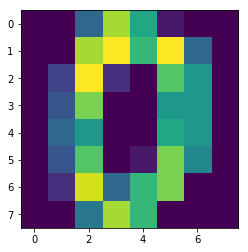

In [16]:
plt.imshow(digits['data'][0].reshape(8,8))
plt.show()

In [15]:
digits['target'][0]

0

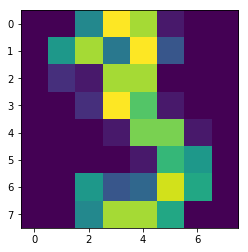

In [17]:
plt.imshow(digits['data'][3].reshape(8,8))
plt.show()

In [19]:
digits['target'][3]

3

## Датасет breasr_cancer

In [68]:
print breast_cancer['DESCR']

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

#### Признаки - действительные числа в различных интервалах.

In [77]:
print breast_cancer['data'][0]

[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]


## Наивный байесовский классификатор

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [71]:
digits_score = pd.DataFrame({'Method':['BernoulliNB', 'MultinomialNB', 'GaussianNB'], 
              'Score':[model_selection.cross_val_score(BernoulliNB(), digits['data'], digits['target']).mean(),
                      model_selection.cross_val_score(MultinomialNB(), digits['data'], digits['target']).mean(),
                      model_selection.cross_val_score(GaussianNB(), digits['data'], digits['target']).mean()]})

In [72]:
digits_score

,Method,Score
0,BernoulliNB,0.825824
1,MultinomialNB,0.870877
2,GaussianNB,0.818600


In [73]:
breast_cancer_score = pd.DataFrame({'Method':['BernoulliNB', 'MultinomialNB', 'GaussianNB'], 
              'Score':[model_selection.cross_val_score(BernoulliNB(), breast_cancer['data'],
                                                       breast_cancer['target']).mean(),
                      model_selection.cross_val_score(MultinomialNB(), breast_cancer['data'],
                                                      breast_cancer['target']).mean(),
                      model_selection.cross_val_score(GaussianNB(), breast_cancer['data'],
                                                      breast_cancer['target']).mean()]})

In [74]:
breast_cancer_score

,Method,Score
0,BernoulliNB,0.627420
1,MultinomialNB,0.894579
2,GaussianNB,0.936749


1. Максимальное качество классификации breast_cancer получилось на нормальном распределение.
2. Максимальное качетсво классификации digits получилось на мультиномиальном распределение.
3. Верны:
    (d) На вещественных признаках лучше всего сработало нормальное распределение
    (c) Мультиномиальное распределение лучше (других?) показало себя на выборке с целыми неотрицательными значениями признаков

Действительно, на целых признаках лучше всего должено было сработать мультиномиальное распределение, т.к. его значения как раз конечное число целых.

А на признаках типа радиус, площадь и т.п. должно было лучше сработать нормальное, т.к. эти признаки принимают вещественные значения и обычно одни и те же объекты имеют нормальное распределение таких признаков.